In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data=pd.read_csv(r"C:\Users\hemch\Downloads\Sleeping Disorder predicttion\Sleep_health_and_lifestyle_dataset.csv")

In [4]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
data.shape

(374, 13)

In [6]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [8]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [9]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [10]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

print("Numerical Columns:")
for column in numerical_columns:
    unique_values = data[column].unique() 
    print(f"{column}: {unique_values}")
# Check object data types
object_columns = data.select_dtypes(include=['object']).columns
print("\nObject Columns:")
for column in object_columns:
    unique_values = data[column].unique() 
    print(f"{column}: {unique_values}")


Numerical Columns:
Person ID: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 

In [11]:
data['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [12]:
data['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

C:\Users\hemch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


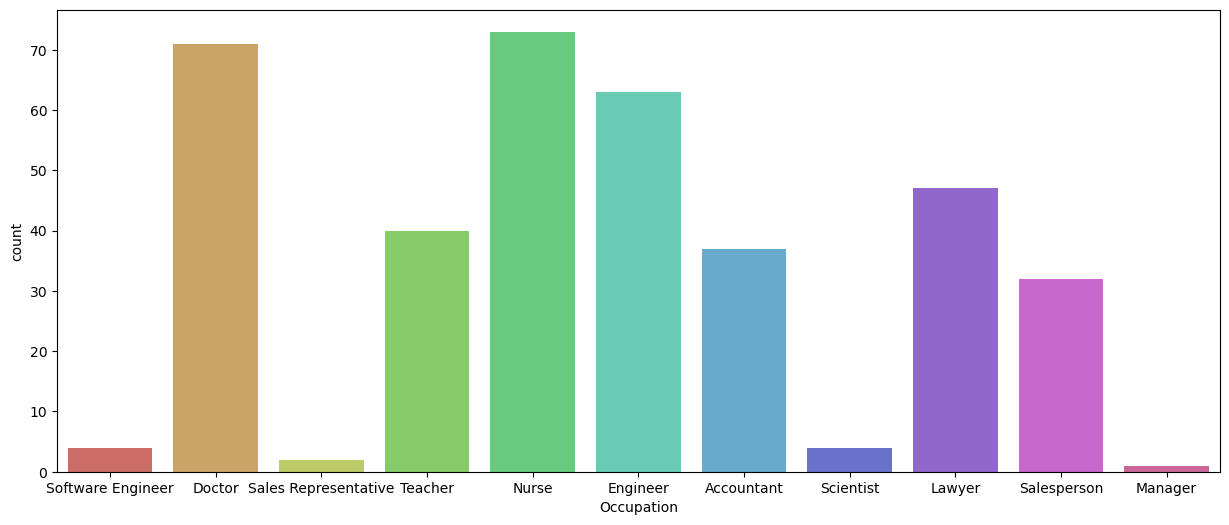

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(data['Occupation'], data = data, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()


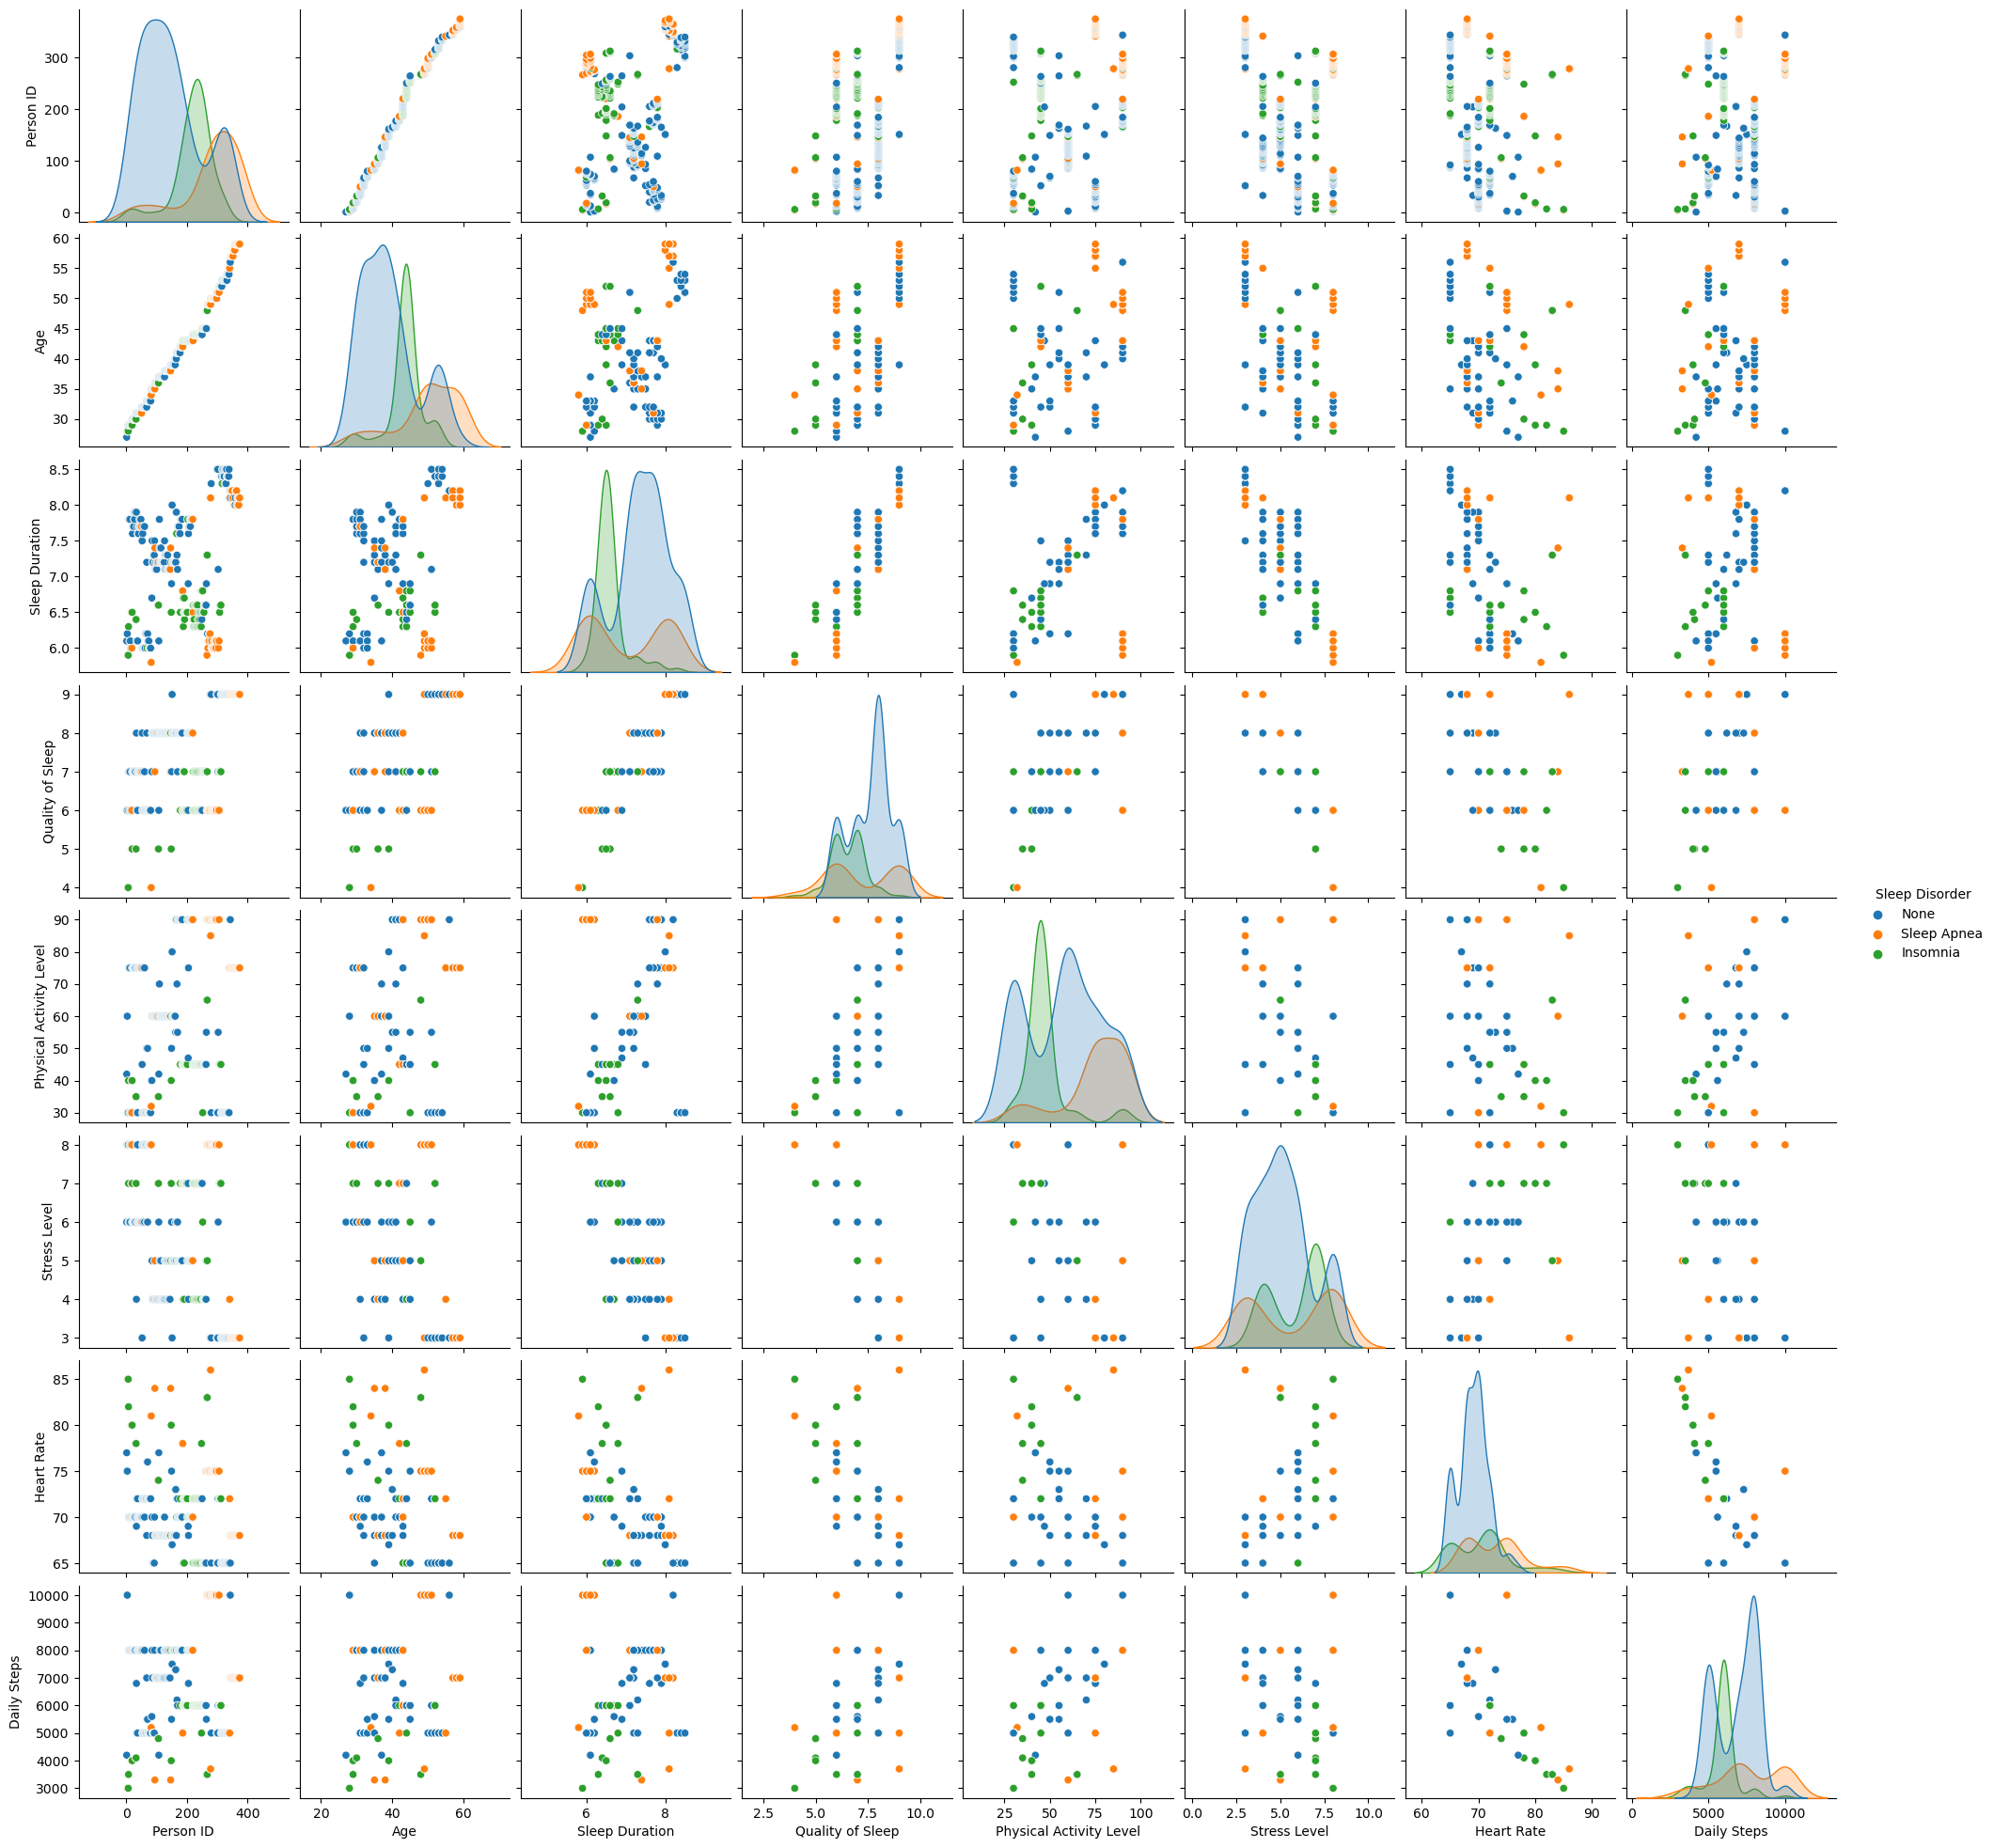

In [14]:
sns.pairplot(data, hue='Sleep Disorder')
plt.show()

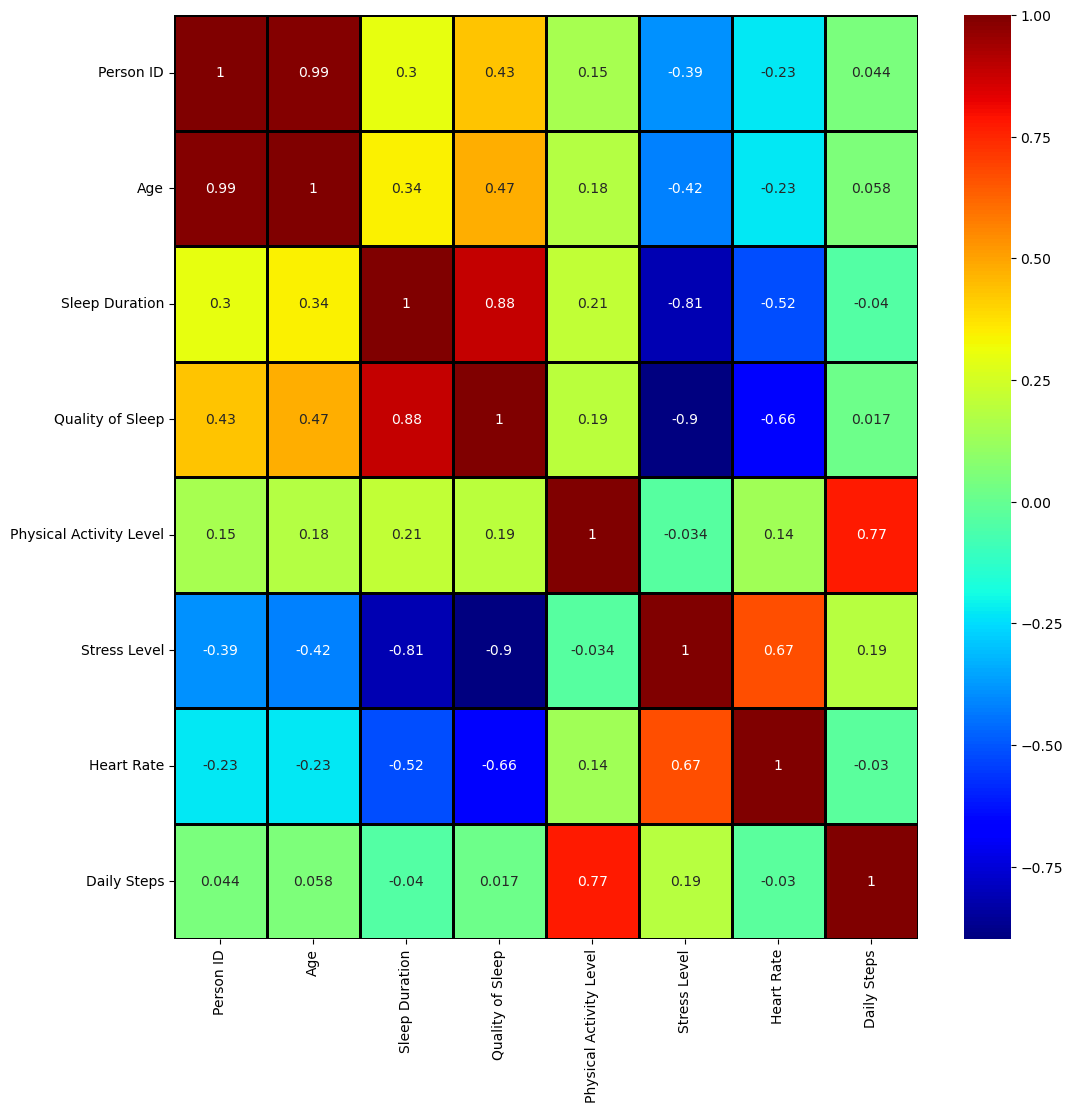

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), cmap='jet', linewidths=1, linecolor='black', annot=True)
plt.show()

In [16]:
data["BMI Category"].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [17]:
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True).astype('int')

In [18]:
data.drop("Blood Pressure",axis=1,inplace=True)

In [19]:
data.drop("Person ID",axis=1,inplace=True)

In [20]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [21]:
data.dropna(inplace=True)

In [22]:
gender= pd.get_dummies(data['Gender'],drop_first=True)

In [23]:
occupation = pd.get_dummies(data['Occupation'],drop_first=True)

In [24]:
bmi= pd.get_dummies(data['BMI Category'],drop_first=True)

In [25]:
data= pd.concat([data,gender,occupation,bmi],axis=1)

In [26]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'Systolic', 'Diastolic', 'Male',
       'Doctor', 'Engineer', 'Lawyer', 'Manager', 'Nurse',
       'Sales Representative', 'Salesperson', 'Scientist', 'Software Engineer',
       'Teacher', 'Normal Weight', 'Obese', 'Overweight'],
      dtype='object')

In [27]:
data.drop('Gender',axis=1,inplace=True)

In [28]:
data.drop('Occupation',axis=1,inplace=True)

In [29]:
data.drop('BMI Category',axis=1,inplace=True)

In [30]:
correlation_matrix=data.corr()

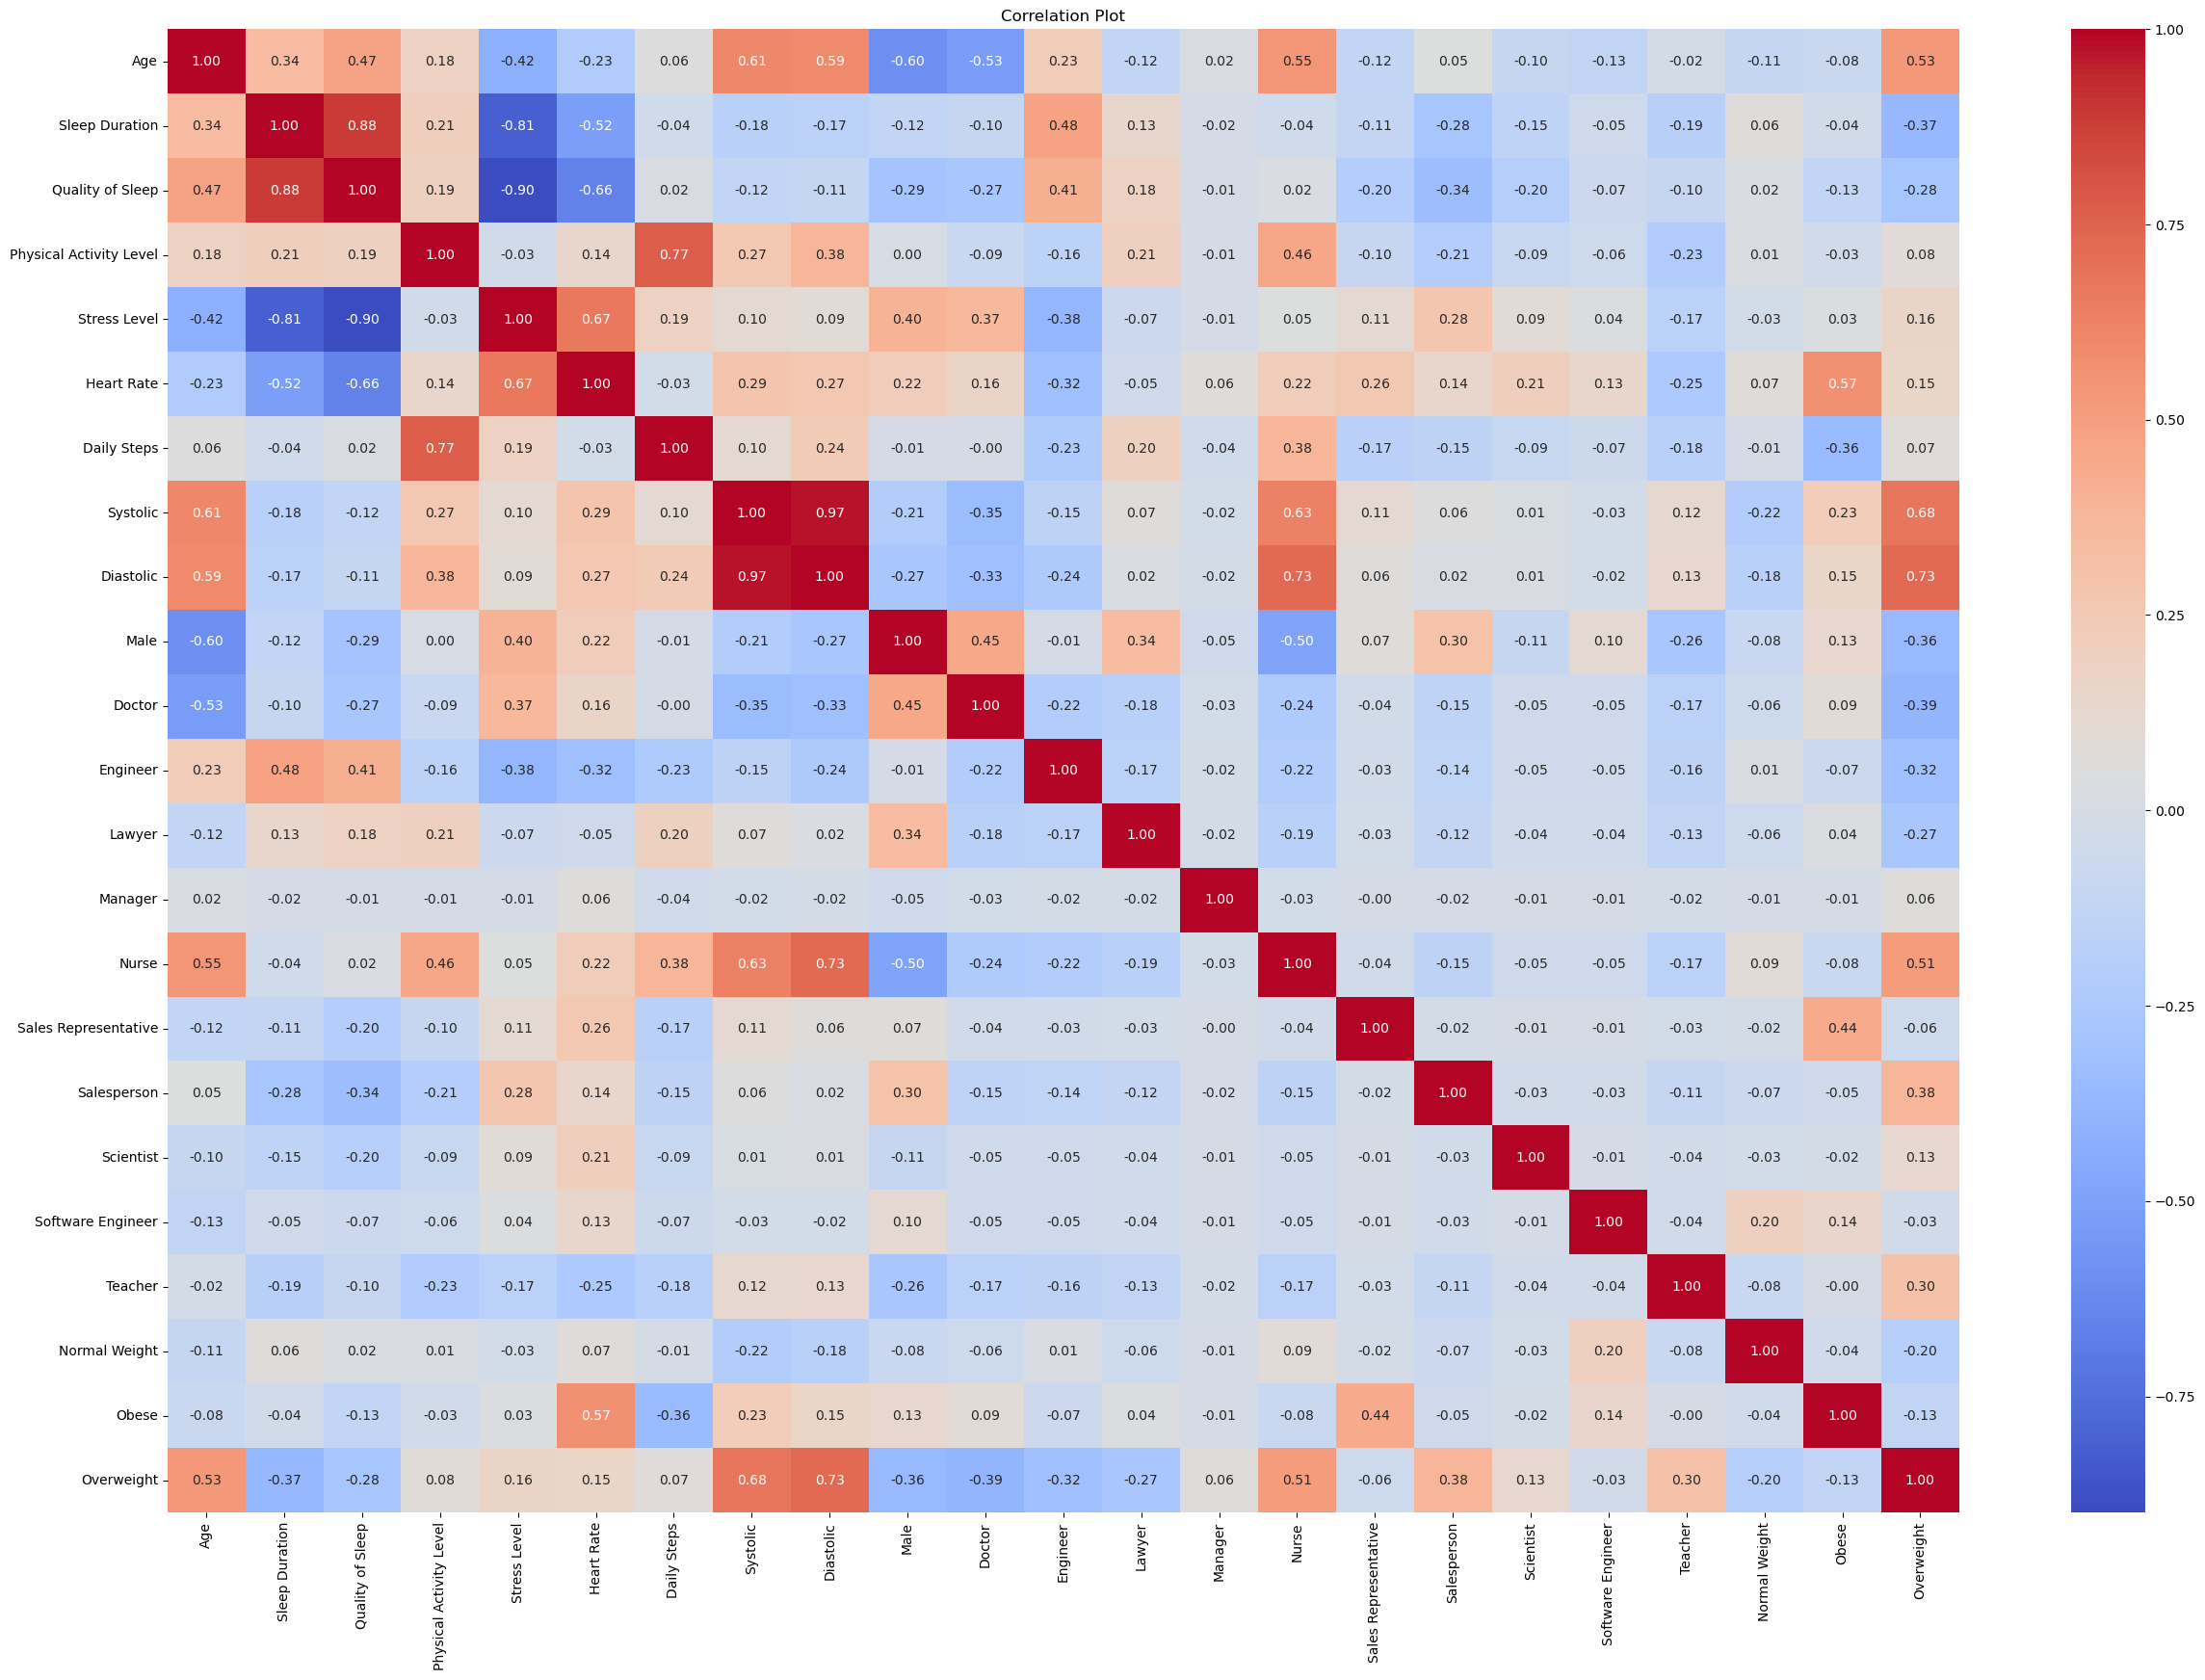

In [31]:
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Plot')
plt.show()


In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])


In [33]:
data.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Systolic', 'Diastolic', 'Male', 'Doctor', 'Engineer', 'Lawyer',
       'Manager', 'Nurse', 'Sales Representative', 'Salesperson', 'Scientist',
       'Software Engineer', 'Teacher', 'Normal Weight', 'Obese', 'Overweight'],
      dtype='object')

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [35]:
from sklearn.preprocessing import binarize
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats
import statsmodels.api as sm

In [36]:
X= data.drop('Sleep Disorder',axis=1)
y= data['Sleep Disorder']

In [37]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtree= DecisionTreeClassifier()

In [40]:
dtree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [41]:
Tpredictions= dtree.predict(X_test_scaled)

In [42]:
print(classification_report(y_test,Tpredictions))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85        22
           1       0.92      0.94      0.93        64
           2       0.80      0.89      0.84        27

    accuracy                           0.89       113
   macro avg       0.89      0.87      0.87       113
weighted avg       0.90      0.89      0.89       113



In [43]:
print(confusion_matrix(y_test,Tpredictions))

[[17  2  3]
 [ 1 60  3]
 [ 0  3 24]]


In [44]:
accuracy = accuracy_score(y_test,Tpredictions)
print("Accuracy:", accuracy)


Accuracy: 0.8938053097345132


In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
clf= RandomForestClassifier(n_estimators=200)

In [47]:
clf.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=200)

In [48]:
Cpred= clf.predict(X_test_scaled)

In [49]:
print(classification_report(y_test,Cpred))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85        22
           1       0.92      0.95      0.94        64
           2       0.83      0.89      0.86        27

    accuracy                           0.90       113
   macro avg       0.90      0.87      0.88       113
weighted avg       0.91      0.90      0.90       113



In [50]:
print(confusion_matrix(y_test,Cpred))

[[17  2  3]
 [ 1 61  2]
 [ 0  3 24]]


In [51]:
accuracy = accuracy_score(y_test,Cpred)
print("Accuracy:", accuracy)

Accuracy: 0.9026548672566371


In [52]:
log_reg = LogisticRegression()

In [53]:
log_reg.fit(X_train_scaled,y_train)

C:\Users\hemch\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
predictions= log_reg.predict(X_test_scaled)

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.36      0.43        22
           1       0.78      0.89      0.83        64
           2       0.84      0.78      0.81        27

    accuracy                           0.76       113
   macro avg       0.72      0.68      0.69       113
weighted avg       0.75      0.76      0.75       113



In [56]:
print(confusion_matrix(y_test,predictions))

[[ 8 12  2]
 [ 5 57  2]
 [ 2  4 21]]


In [57]:
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7610619469026548
